In [34]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support

### 数据

In [31]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names[:-1]
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2], 
                                                    test_size = 0.5, random_state = random_state)

### 分类模型

In [37]:
classifier = LinearSVC(random_state = random_state)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_score = classifier.decision_function(X_test)
print(y_test)
print(y_pred)
print(y_score)

[1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0
 0 0 0 1 1 1 1 0 1 1 0 1 0]
[0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 1]
[-0.2   0.3   0.2   0.28  0.43 -0.15 -0.09 -0.13  0.23 -0.24 -0.06 -0.15
 -0.05  0.1   0.05 -0.11  0.16  0.05 -0.08 -0.26  0.25 -0.18 -0.38  0.26
  0.13 -0.04  0.39  0.42 -0.48 -0.31 -0.09  0.01 -0.2   0.4  -0.05  0.12
  0.06 -0.07  0.   -0.4   0.03  0.2   0.07  0.5  -0.28  0.31  0.19  0.12
  0.03  0.22]


### 模型表现

####  Confusion Matrix

In [42]:
np.set_printoptions(precision = 2)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print(cm)
print(TN, FP, FN, TP)

[[17  7]
 [ 5 21]]
17 7 5 21


正规化后的混淆矩阵：
[[0.71 0.29]
 [0.19 0.81]]
没有进行正规化的混淆矩阵：
[[17  7]
 [ 5 21]]


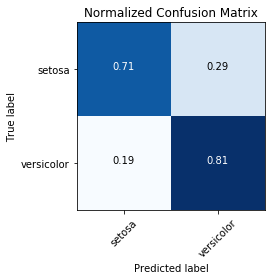

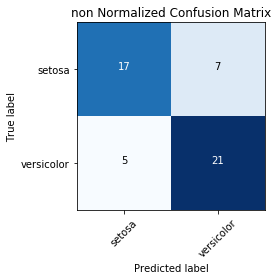

In [39]:
# print and plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize = False, title = "Confusion Matrix", cmap = plt.cm.Blues):
    """
    # print and plot the confusion matrix
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('正规化后的混淆矩阵：')
    else:
        print('没有进行正规化的混淆矩阵：')
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '0.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, 
                 i,
                 format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cm, classes = class_names, normalize = True, title = "Normalized Confusion Matrix")
plt.figure()
plot_confusion_matrix(cm, classes = class_names, normalize = False, title = "non Normalized Confusion Matrix")
plt.show()

#### Precision, Recall, Average_precision_score

In [48]:
average_precision = average_precision_score(y_test, y_score)
precision, recall, _ = precision_recall_curve(y_test, y_score)
recall_macro = recall_score(y_test, y_pred, average = 'macro')
recall_micro = recall_score(y_test, y_pred, average = 'micro')
recall_weighted = recall_score(y_test, y_pred, average = 'weighted')
recall_binary = recall_score(y_test, y_pred, average = 'binary')
# recall_samples = recall_score(y_test, y_pred, average = 'samples')
print(average_precision)
print(precision)
print(recall)
print(recall_binary)

0.8783170534965226
[0.62 0.61 0.62 0.64 0.63 0.65 0.67 0.69 0.68 0.67 0.69 0.71 0.73 0.76
 0.75 0.78 0.77 0.76 0.75 0.78 0.77 0.81 0.8  0.84 0.89 0.88 0.88 0.93
 0.93 0.92 0.92 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.  ]
[1.   0.96 0.96 0.96 0.92 0.92 0.92 0.92 0.88 0.85 0.85 0.85 0.85 0.85
 0.81 0.81 0.77 0.73 0.69 0.69 0.65 0.65 0.62 0.62 0.62 0.58 0.54 0.54
 0.5  0.46 0.42 0.42 0.38 0.35 0.31 0.27 0.23 0.19 0.15 0.12 0.08 0.04
 0.  ]
0.8076923076923077


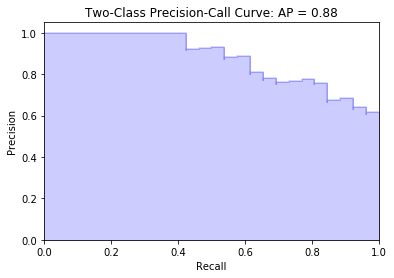

In [41]:
def plot_precision_recall_curve(y_test, y_score):
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    step_kwargs = {'step': 'post'}
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Two-Class Precision-Call Curve: AP = {0:0.2f}'.format(average_precision))
plot_precision_recall_curve(y_test, y_score)